In [376]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(context='notebook', style='darkgrid',palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [377]:
airlines=pd.read_csv('airlines.csv')
airports=pd.read_csv('airports.csv',encoding= 'unicode_escape')
events_US=pd.read_csv('events_US.csv',encoding= 'unicode_escape')
flight_traffic=pd.read_csv('flight_traffic.csv')
stock_prices=pd.read_csv('stock_prices.csv')
fares=pd.read_csv('fares.csv')
weather=pd.read_csv('weather.csv')

In [378]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [379]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis
### [1. Flight Traffic](#flight_traffic)
### [2. Stock](#stock)
### [3. Weather](#weather)
### [4. Combine Tables](#combine)


In [380]:
airlines.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [381]:
airlines.size

122

In [382]:
airports.head()
#from this, we can find where are the neighbours of an airport

,airport_id,airport_name,city,state,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,31.53552,-84.19447


In [383]:
airports.size

1932

In [384]:
events_US.head()

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference


In [385]:
events_US_airport=events_US.merge(airports,left_on=['city','state'], right_on=['city','state'])
events_US_airport.columns

Index(['date', 'city', 'state', 'event_name', 'airport_id', 'airport_name',
       'latitude', 'longitude'],
      dtype='object')

In [386]:
events_US_airport.drop(['airport_name','event_name','city','state',
                       'latitude','longitude'],axis=1,inplace=True)

In [387]:
events_US_airport.head()

,date,airport_id
0,4/1/17,JFK
1,4/1/17,LGA
2,5/1/17,JFK
3,5/1/17,LGA
4,5/1/17,JFK


# 1. Flight Traffic + Events<a id="flight_traffic"></a>

Types of Delays:


**airline_delay**: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

**weather_delay**: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

**air_system_delay**: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

**aircraft_delay**: A previous flight with same aircraft arrived late, causing the present flight to depart late.

**security_delay**: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.


#### **Hypothesis**: 
1. Based on this above explaination, our hypothesis is that delays or cancellations caused by the airline can work on improving, and airline delay might be associate with aircraft delay. 

In [388]:
flight_traffic=pd.read_csv('flight_traffic.csv')

In [389]:
flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [390]:
#let's combine the year, month and day into actual date.
flight_traffic['date']=pd.to_datetime(flight_traffic[["year", "month", "day"]])

In [391]:
flight_traffic.isnull().sum()

year                        0
month                       0
day                         0
airline_id                  0
origin_airport              0
destination_airport         0
scheduled_departure         0
actual_departure         8053
taxi_out                 8232
wheels_off               8232
wheels_on                8478
taxi_in                  8478
scheduled_arrival           0
actual_arrival           8478
cancelled                   0
diverted                    0
scheduled_elapsed           1
actual_elapsed           9536
distance                    0
airline_delay          465067
weather_delay          465067
air_system_delay       465067
security_delay         465067
aircraft_delay         465067
date                        0
dtype: int64

In [392]:
flight_traffic.describe()

,year,month,day,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
count,567673.0,567673.000000,567673.000000,567673.000000,559620.000000,559441.000000,559441.000000,559195.000000,559195.000000,567673.000000,...,567673.000000,567673.000000,567672.000000,558137.000000,567673.000000,102606.000000,102606.000000,102606.000000,102606.000000,102606.000000
mean,2017.0,6.542909,15.741490,1330.138055,1333.738726,16.759742,1355.668278,1464.290453,7.505046,1488.999338,...,0.014593,0.002207,146.970129,141.690062,856.468541,19.872220,2.751652,15.865164,0.083806,25.340107
std,0.0,3.390609,8.775778,490.640811,504.086954,9.336857,505.981109,533.711712,5.888643,518.789647,...,0.119917,0.046930,77.088542,76.628710,624.533648,62.413858,24.813047,35.569305,2.315777,46.937251
min,2017.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,18.000000,16.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,4.000000,8.000000,914.000000,915.000000,11.000000,930.000000,1047.000000,4.000000,1104.000000,...,0.000000,0.000000,90.000000,85.000000,391.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.0,7.000000,16.000000,1324.000000,1328.000000,14.000000,1340.000000,1506.000000,6.000000,1519.000000,...,0.000000,0.000000,128.000000,123.000000,680.000000,1.000000,0.000000,2.000000,0.000000,4.000000
75%,2017.0,9.000000,23.000000,1735.000000,1743.000000,20.000000,1757.000000,1912.000000,9.000000,1920.000000,...,0.000000,0.000000,180.000000,175.000000,1096.000000,17.000000,0.000000,19.000000,0.000000,32.000000
max,2017.0,12.000000,31.000000,2359.000000,2400.000000,176.000000,2400.000000,2400.000000,413.000000,2359.000000,...,1.000000,1.000000,718.000000,726.000000,4983.000000,1895.000000,1336.000000,1138.000000,322.000000,1336.000000


In [393]:
flight_traffic.columns

Index(['year', 'month', 'day', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay', 'date'],
      dtype='object')

In [394]:
#there are some columns can be dropped
flight_traffic.drop(['taxi_out','taxi_in','wheels_on','wheels_off','scheduled_elapsed','actual_elapsed'],axis=1,inplace=True)

In [395]:
flight_traffic.isnull().sum()

year                        0
month                       0
day                         0
airline_id                  0
origin_airport              0
destination_airport         0
scheduled_departure         0
actual_departure         8053
scheduled_arrival           0
actual_arrival           8478
cancelled                   0
diverted                    0
distance                    0
airline_delay          465067
weather_delay          465067
air_system_delay       465067
security_delay         465067
aircraft_delay         465067
date                        0
dtype: int64

In [396]:
flight_traffic.shape

(567673, 19)

In [397]:
465067/567673
#82% of the delay data is missing

0.8192515761714931

In [398]:
flight_traffic['delay_departure_mins']=flight_traffic['actual_departure']-flight_traffic['scheduled_arrival']
flight_traffic['delay_arrival_mins']=flight_traffic['actual_arrival']-flight_traffic['actual_departure']


In [399]:
#for those flights that were delayed but we don't know what caused the delay
#we can fillna

flight_traffic.fillna(0,inplace=True)

In [400]:
flight_delay_cancelled=(flight_traffic[(flight_traffic['cancelled']==1) | 
                                      (flight_traffic['delay_departure_mins']>0.0)
                                     | (flight_traffic['delay_arrival_mins']>0.0)])


In [401]:
flight_delay_cancelled.shape

(560955, 21)

In [402]:
#we can add a column stating whether the date is having an event

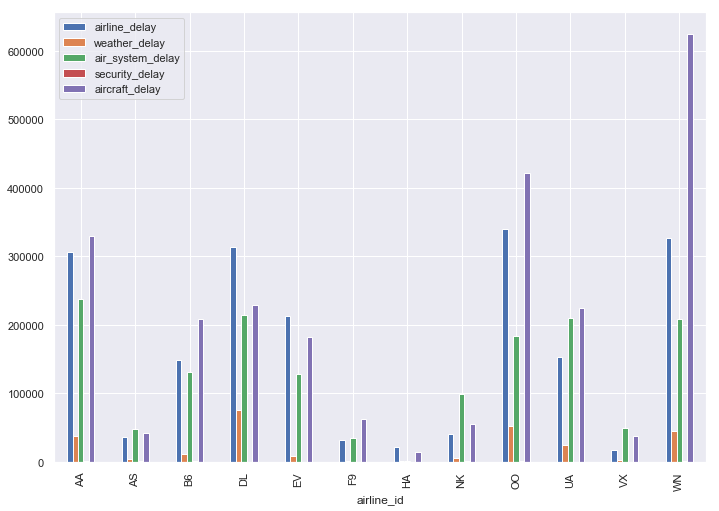

In [403]:
#totoal number of mins delay due to various types of delays across different airlines
flight_delay_cancelled.groupby('airline_id')['airline_delay','weather_delay','air_system_delay','security_delay','aircraft_delay'].sum().plot(kind='bar')


Airline delay can be associated with Aircraft delay because if airline delay can cause the next flight with same aircraft arrived late as well. From this above plot, we can see that some airline like AA, B6, OO, UA, WN are the airlines that have more airline delays than the aircraft delay. We can take a look for their stock performance to see if the total minutes caused by airline delay will affect 

In [404]:
#let's add a column saying whether there was an event on a specific day
events_US_airport.head()
#if date in events_US_airport, then the obervation would be 1 in event column

,date,airport_id
0,4/1/17,JFK
1,4/1/17,LGA
2,5/1/17,JFK
3,5/1/17,LGA
4,5/1/17,JFK


In [405]:
events_US_airport.describe()

,date,airport_id
count,1013,1013
unique,297,47
top,6/10/17,LGA
freq,14,199


In [406]:
events_US_airport.date=pd.to_datetime(events_US_airport.date)

In [407]:
#notice that the date is out of order
events_US_airport=events_US_airport.sort_values('date').reset_index(drop=True)

In [408]:
flight_delay_cancelled=flight_delay_cancelled.sort_values('date').reset_index(drop=True)

In [409]:
# flight_delay_cancelled.loc[:,['date','origin_airport','destination_airport']]

In [410]:
a=(flight_delay_cancelled.loc[:,['date','origin_airport','destination_airport']]
                    .merge(events_US_airport, left_on='date', right_on='date'))

In [411]:
a.columns

Index(['date', 'origin_airport', 'destination_airport', 'airport_id'], dtype='object')

In [412]:
a['event_original']=[1 if a.airport_id[i]==a.origin_airport[i] else 0 for i in range(len(a))]
a['event_destination']=[1 if a.airport_id[i]==a.destination_airport[i] else 0 for i in range(len(a))]

In [413]:
a.head()

,date,origin_airport,destination_airport,airport_id,event_original,event_destination
0,2017-01-02,SFO,DEN,MEM,0,0
1,2017-01-02,SFO,DEN,JFK,0,0
2,2017-01-02,SFO,DEN,LGA,0,0
3,2017-01-02,SFO,DEN,LAX,0,0
4,2017-01-02,FLL,SEA,MEM,0,0


In [414]:
flight_delay_cancelled=flight_delay_cancelled.merge(a,left_on=['date','origin_airport','destination_airport'],
                             right_on=['date','origin_airport','destination_airport']                                       
                            ).drop('airport_id',axis=1)


In [415]:
delay_corr=(flight_delay_cancelled[['delay_departure_mins','delay_arrival_mins',
                        'airline_delay', 'weather_delay', 'air_system_delay',
       'security_delay', 'aircraft_delay']].corr())
delay_corr.style.background_gradient(cmap='coolwarm')

,delay_departure_mins,delay_arrival_mins,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
delay_departure_mins,1,-0.892641,0.0172098,0.00419637,0.00967583,-0.00143295,0.0486252
delay_arrival_mins,-0.892641,1,-0.0273298,-0.0147505,0.00763996,0.00382104,-0.0797451
airline_delay,0.0172098,-0.0273298,1,-0.00202792,0.0152034,-0.000708326,0.0607536
weather_delay,0.00419637,-0.0147505,-0.00202792,1,0.0247857,-0.000600248,0.0212519
air_system_delay,0.00967583,0.00763996,0.0152034,0.0247857,1,0.00205488,0.0453269
security_delay,-0.00143295,0.00382104,-0.000708326,-0.000600248,0.00205488,1,0.00171898
aircraft_delay,0.0486252,-0.0797451,0.0607536,0.0212519,0.0453269,0.00171898,1


In [416]:
#Let's see if there's any difference in correlation when we only filter the destination airports that have events
(flight_delay_cancelled[flight_delay_cancelled['event_destination']==1]
[['delay_departure_mins','delay_arrival_mins',
                        'airline_delay', 'weather_delay', 'air_system_delay',
       'security_delay', 'aircraft_delay']]).corr().style.background_gradient(cmap='coolwarm')

,delay_departure_mins,delay_arrival_mins,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
delay_departure_mins,1,-0.922667,-0.00109781,0.0260937,-0.00327013,-0.0103131,0.0111595
delay_arrival_mins,-0.922667,1,-0.0196397,-0.0497599,0.0283065,0.014806,-0.0341264
airline_delay,-0.00109781,-0.0196397,1,-0.00438296,0.00373485,-0.00189881,0.0427604
weather_delay,0.0260937,-0.0497599,-0.00438296,1,0.038808,-0.000250007,0.00940639
air_system_delay,-0.00327013,0.0283065,0.00373485,0.038808,1,-0.00309521,0.0539756
security_delay,-0.0103131,0.014806,-0.00189881,-0.000250007,-0.00309521,1,0.00225075
aircraft_delay,0.0111595,-0.0341264,0.0427604,0.00940639,0.0539756,0.00225075,1


In [417]:
#Let's see if there's any difference in correlation when we only filter the original airports that have events
(flight_delay_cancelled[flight_delay_cancelled['event_original']==1]
[['delay_departure_mins','delay_arrival_mins',
                        'airline_delay', 'weather_delay', 'air_system_delay',
       'security_delay', 'aircraft_delay']]).corr().style.background_gradient(cmap='coolwarm')

,delay_departure_mins,delay_arrival_mins,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
delay_departure_mins,1,-0.909762,0.0164874,-0.0177082,0.00298426,-0.00927655,0.0550513
delay_arrival_mins,-0.909762,1,-0.025817,0.000551026,0.00421571,0.0134716,-0.075413
airline_delay,0.0164874,-0.025817,1,-0.00127175,0.0320764,-0.00280801,0.0805678
weather_delay,-0.0177082,0.000551026,-0.00127175,1,0.0208672,-0.000881813,0.00425615
air_system_delay,0.00298426,0.00421571,0.0320764,0.0208672,1,-0.00244576,0.045922
security_delay,-0.00927655,0.0134716,-0.00280801,-0.000881813,-0.00244576,1,0.00104072
aircraft_delay,0.0550513,-0.075413,0.0805678,0.00425615,0.045922,0.00104072,1


In [418]:
#Let's see what are the most popular routes among these airlines
(flight_delay_cancelled[['airline_id','origin_airport','destination_airport']].groupby(['origin_airport','destination_airport'])
                                                                                .count()
                                                                                .sort_values(by=['airline_id'],ascending=False)
                                                                                .head(10))


airline_id
origin_airport destination_airport            
SFO            LAX                       26907
LAX            SFO                       21754
JFK            LAX                       15109
LAX            JFK                       14946
               LAS                       13931
LAS            LAX                       11377
SEA            LAX                       11273
ORD            LGA                       10352
OGG            HNL                       10230
HNL            OGG                       10055

Based on the most popular routes, we can see that LAX is the most popular original and destination airport. As a result, we can study how the weather effect flight delay flying from and to LAX.

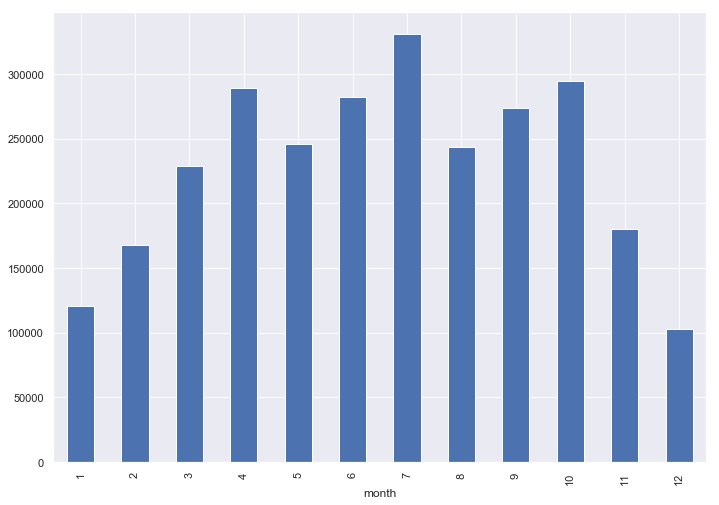

In [419]:
#Let's plot to see if there's more delays/cancellations in certain months
flight_delay_cancelled.reset_index().groupby(['month'])['airline_id'].count().plot(kind='bar')
#It seems like there are more delays/cancellations in summer [June-Augest]

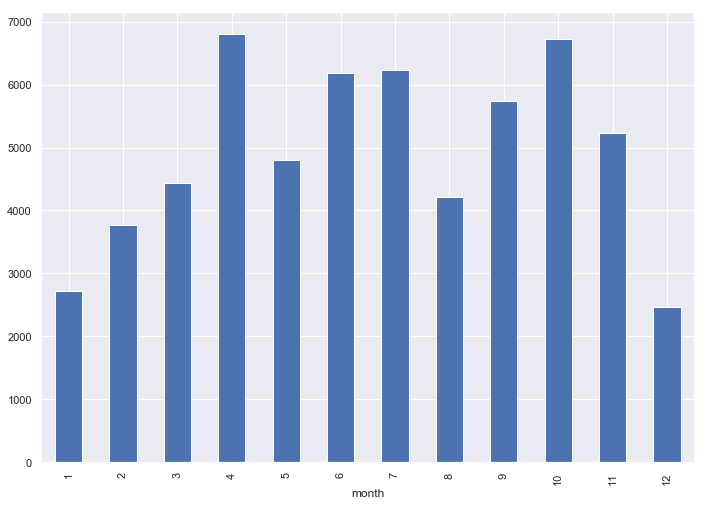

In [420]:
#Let's plot to see if there's more delays/cancellations in certain months when there are events at the original airport
flight_delay_cancelled[flight_delay_cancelled['event_original']==1].reset_index().groupby(['month'])['airline_id'].count().plot(kind='bar')


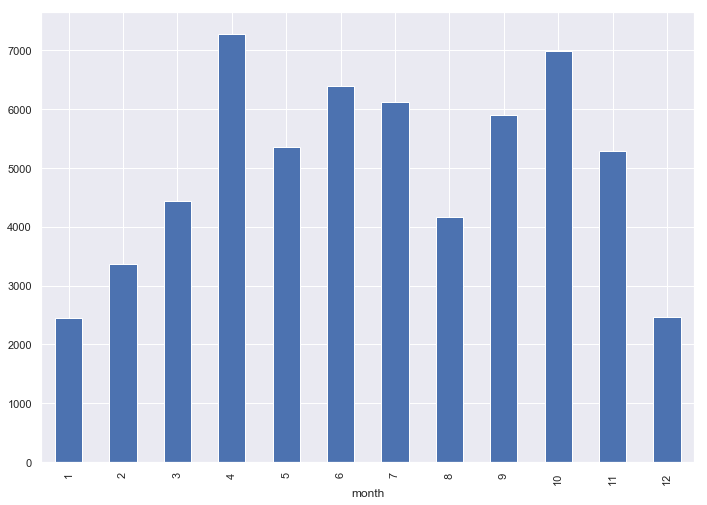

In [421]:
#Let's plot to see if there's more delays/cancellations in certain months when there are events at the destination airport
flight_delay_cancelled[flight_delay_cancelled['event_destination']==1].reset_index().groupby(['month'])['airline_id'].count().plot(kind='bar')


# 2. Stock <a id="stock"></a>

In [422]:
#How does an airline’s general flying patterns (e.g. traffic volume, destination
# choices) relate to that airline’s financial / stock performance?
stock_prices=pd.read_csv('stock_prices.csv')
stock_prices.head(10)
#filter the timestamp to 2017-2018(possibly)

#if the fares go up, would the stock go up?

#we can pick one airline, and see it's performance overtime

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85
5,3/29/18,51.96,69.4700,20.32,54.40,61.96,37.7800,57.280,54.81,38.70
6,3/28/18,50.85,67.9100,20.17,53.95,61.57,36.9900,56.250,53.93,38.35
7,3/27/18,50.90,68.1800,19.95,54.30,61.49,37.1900,56.690,54.26,37.15
8,3/26/18,51.86,68.4800,20.48,55.60,62.16,38.2700,57.590,55.06,36.20
9,3/23/18,51.01,67.3900,20.84,54.95,61.88,39.9600,56.720,53.90,35.60


In [423]:
#change timestamp to time
stock_prices['timestamp'] = pd.to_datetime(stock_prices['timestamp'])

In [424]:
stock_prices=stock_prices[(stock_prices['timestamp']>='2017-01-01')&(stock_prices['timestamp']<='2017-12-31')]

In [425]:
#only extract the data
# stock_prices['timestamp'] = pd.to_datetime(stock_prices['timestamp']).dt.date

In [426]:
stock_prices.dtypes

timestamp    datetime64[ns]
AA                  float64
UA                  float64
B6                  float64
OO                  float64
AS                  float64
NK                  float64
WN                  float64
DL                  float64
HA                  float64
dtype: object

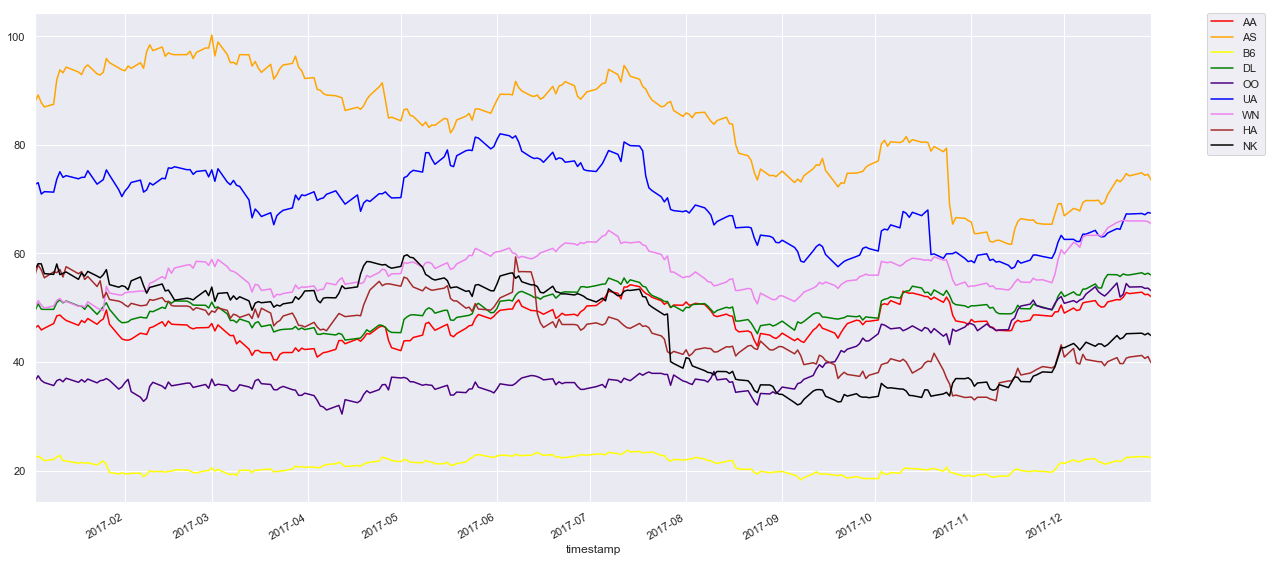

In [427]:
# Let's see how the stock prices fluctuate in each airline 
stock_prices.reset_index().plot(x='timestamp', y=['AA', 'AS', 'B6', 'DL', 'OO', 'UA', 'WN', 'HA', 'NK'],
                               figsize=(20,10), color=['red', 'orange', 'yellow', 'green', 
                                                        'indigo', 'blue', 'violet', 'brown','black'])

# Put the legend out of the figure

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);


In [428]:
stock_prices=(stock_prices.set_index('timestamp') #set index to timestamp
                          .sort_index() #sort the dates so they start from January
                          .diff(axis=0) #find the difference in stock price between dates
                          .reset_index() #make timestamp index again
                          .dropna()) #drop the first row, it is NaN because there is no row to subtract from

In [429]:
stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
1,2017-01-04,0.40,0.31,0.26,0.90,1.18,1.01,1.32,1.22,1.70
2,2017-01-05,-0.81,-2.09,-0.38,-0.85,-1.42,-0.03,-0.83,-0.97,-0.90
3,2017-01-06,0.32,0.44,-0.44,-0.40,-0.78,-1.80,-0.54,-0.05,-1.45
4,2017-01-09,0.87,-0.09,0.22,-0.55,0.49,-0.14,0.37,0.01,1.10
5,2017-01-10,1.40,2.38,0.46,0.90,4.53,1.92,1.04,1.24,-0.15


In [430]:
stock_prices=stock_prices.melt(id_vars=["timestamp"], 
                               var_name="airline_id", 
                               value_name="Stock").rename(columns={'timestamp':'date'})

In [431]:
airline_ids=stock_prices.airline_id.unique()

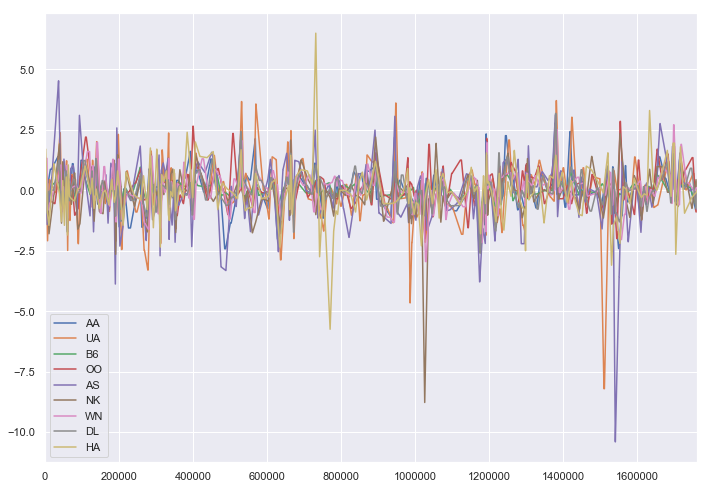

In [432]:
# Let's see how the stock prices fluctuate in each airline 
for airline in airline_ids:
    combined[combined['airline_id']==airline]['Stock'].plot()

plt.legend(airline_ids);


# 3. Weather <a id="weather"></a>

We would like to combine this weather and flight traffic tables to see if we can use this weather feature to classify whether or not a flight will get delay? Look at the feature important to see what are some major weather feature that lead to flight delay.
How does the severity of weather relate to actual impact on airline flight
delays? Is there a breakpoint of weather severity at which flights are more often impacted? 

In [433]:
weather=pd.read_csv('weather.csv')

In [434]:
weather.head(5)

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [435]:
#only keep the date but not the time
weather['datetime'] = pd.to_datetime(weather['datetime']).dt.date

In [436]:
weather=weather.drop(columns=['airport_name', 'latitude','longitude','elevation'])

In [437]:
weather.head()

,airport_id,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,2017-01-01,3.9,16093,220,7.2,NaN,NaN
1,BUF,2017-01-01,0.6,16093,260,6.2,NaN,NaN
2,BUF,2017-01-01,-0.6,16093,250,5.1,NaN,9.0
3,BUF,2017-01-01,2.2,16093,240,5.7,NaN,9.0
4,BUF,2017-01-02,-0.6,16093,170,1.5,NaN,NaN


In [438]:
#since we want to mainly focus on LAX airport, let's filter it out first
weather_LAX=weather[weather['airport_id']=='LAX']
weather_LAX.head()

,airport_id,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
327000,LAX,2017-01-01,11.7,14484,280,7.7,NaN,NaN
327001,LAX,2017-01-01,10.6,16093,310,2.1,NaN,9.0
327002,LAX,2017-01-01,6.1,14484,80,2.6,NaN,NaN
327003,LAX,2017-01-01,12.8,16093,120,2.6,NaN,9.0
327004,LAX,2017-01-02,12.2,16093,260,3.1,NaN,9.0


In [439]:
#since LAX doesn't have snow, we can just drop that column
weather_LAX.drop('snow_depth',axis=1,inplace=True)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [440]:
weather_LAX.isnull().sum()

airport_id          0
datetime            0
temperature         0
visibility          0
wind_direction      0
wind_speed          0
cloud_status      221
dtype: int64

In [441]:
#now that we calculate the average temperature,visibility,wind_direction,wind_speed,cloud_status
#for each date
weather_LAX.groupby('datetime')[weather_LAX.columns[2:]].mean().head()

,temperature,visibility,wind_direction,wind_speed,cloud_status
datetime,,,,,
2017-01-01,10.300,15288.50,197.50,3.750,9.0
2017-01-02,11.800,15690.75,150.00,3.100,9.0
2017-01-03,11.375,16093.00,115.00,2.325,9.0
2017-01-04,13.325,16093.00,442.25,1.700,9.0
2017-01-05,13.450,7040.75,150.00,3.100,9.0


In [442]:
#Let's study this LAX weather and flight traffic
airline_delay_cancelled.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,cancelled,diverted,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,date,delay_mins
13,2017,1,3,AA,PHX,IND,1955,1952.0,112,50.0,0,0,1488,NaN,NaN,NaN,NaN,NaN,2017-01-03,1840.0
14,2017,1,5,AA,PHX,IND,1955,2130.0,112,231.0,0,0,1488,0.0,0.0,0.0,0.0,79.0,2017-01-05,2018.0
43,2017,1,2,AA,PHX,SEA,2340,2354.0,144,143.0,0,0,1107,NaN,NaN,NaN,NaN,NaN,2017-01-02,2210.0
130,2017,1,15,AA,PHX,DFW,1605,1942.0,1927,20.0,0,0,868,0.0,0.0,293.0,0.0,0.0,2017-01-15,15.0
171,2017,1,9,AA,PDX,PHX,837,NaN,1209,NaN,1,0,1009,NaN,NaN,NaN,NaN,NaN,2017-01-09,NaN


In [443]:
#let's filter the airport to only LAX
LAX_airline_delay_cancelled=airline_delay_cancelled[(airline_delay_cancelled['origin_airport']=='LAX')|\
                                                   (airline_delay_cancelled['destination_airport']=='LAX')]

In [444]:
#we have 4441 of plane flying from and to LAX that were either cancelled or delay
#let's compare this to the total
LAX_airline_delay_cancelled.shape

(4938, 20)

In [445]:
flight_traffic[(flight_traffic['origin_airport']=='LAX')|\
                                 (flight_traffic['destination_airport']=='LAX')].shape

(43238, 21)

In [446]:
4441/42821
#we can see that 10% of the flight from and to LAX were delay
#Let's continue dig in the data and see if we could make any improvement by reducing the percentage 

0.10371079610471498

In [447]:
#Previously, we found that AA, DL, EV, OO had delays caused by airline delay.
#In here, we can take a deeper look to study each airline.
AA_LAX=airline_delay_cancelled.reset_index()[airline_delay_cancelled.reset_index()['airline_id']=='AA']
DL_LAX=airline_delay_cancelled.reset_index()[airline_delay_cancelled.reset_index()['airline_id']=='DL']
EV_LAX=airline_delay_cancelled.reset_index()[airline_delay_cancelled.reset_index()['airline_id']=='EV']
OO_LAX=airline_delay_cancelled.reset_index()[airline_delay_cancelled.reset_index()['airline_id']=='OO']

In [448]:
AA_LAX.shape

(5900, 21)

In [449]:
DL_LAX.shape

(5835, 21)

In [450]:
EV_LAX.shape

(2810, 21)

In [451]:
OO_LAX.shape

(5098, 21)

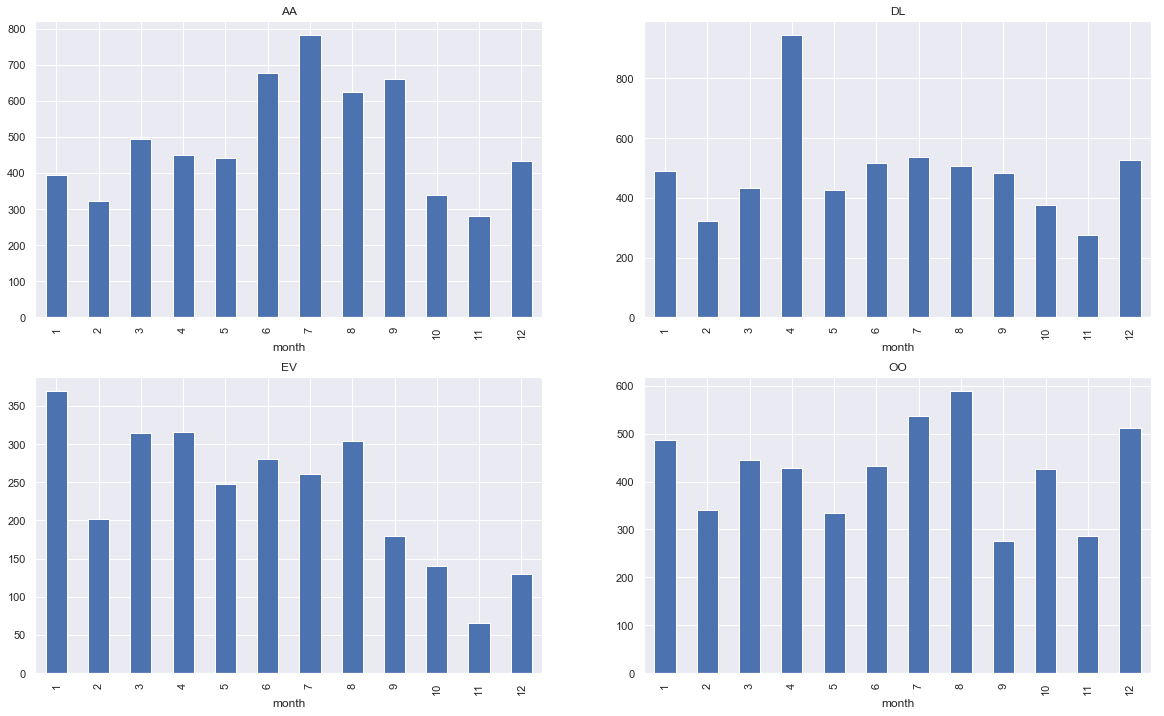

In [452]:
plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
AA_LAX.groupby(['month'])['airline_id'].count().plot(kind='bar')
plt.title('AA')

plt.subplot(2,2,2)
DL_LAX.groupby(['month'])['airline_id'].count().plot(kind='bar')
plt.title('DL')

plt.subplot(2,2,3)
EV_LAX.groupby(['month'])['airline_id'].count().plot(kind='bar')
plt.title('EV')

plt.subplot(2,2,4)
OO_LAX.groupby(['month'])['airline_id'].count().plot(kind='bar')
plt.title('OO');

Based on this plot, it seems like that OO airline has many delays/cancellations across the whole year while AA airline only has most delays/cancellations in summer.

# 4. Combined Table <a id="combine"></a>

In [453]:
flight_delay_cancelled = flight_delay_cancelled.set_index(['date', 'airline_id'])
stock_prices = stock_prices.set_index(['date', 'airline_id'])

In [454]:
combined=flight_delay_cancelled.join(stock_prices, how='left').reset_index()
combined = combined[~combined['Stock'].isna()].reset_index(drop=True)
combined.head()

,date,airline_id,year,month,day,origin_airport,destination_airport,scheduled_departure,actual_departure,scheduled_arrival,...,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,delay_departure_mins,delay_arrival_mins,event_original,event_destination,Stock
0,2017-01-04,AA,2017,1,4,ORD,PDX,1650,1813.0,1922,...,80.0,0.0,0.0,0.0,0.0,-109.0,229.0,0,0,0.4
1,2017-01-04,AA,2017,1,4,ORD,PDX,1650,1813.0,1922,...,80.0,0.0,0.0,0.0,0.0,-109.0,229.0,0,0,0.4
2,2017-01-04,AA,2017,1,4,ORD,PDX,1650,1813.0,1922,...,80.0,0.0,0.0,0.0,0.0,-109.0,229.0,0,0,0.4
3,2017-01-04,AA,2017,1,4,ORD,PDX,1650,1813.0,1922,...,80.0,0.0,0.0,0.0,0.0,-109.0,229.0,0,0,0.4
4,2017-01-04,AA,2017,1,4,ORD,PDX,1650,1813.0,1922,...,80.0,0.0,0.0,0.0,0.0,-109.0,229.0,0,0,0.4


In [455]:
#create a new column with the difference between scheduled_departure-actual_departure
combined['delay_mins']=combined['actual_departure']-combined['scheduled_departure']

In [456]:
combined['delay_mins'].describe()

count    1.761853e+06
mean    -1.946915e+01
std      2.410175e+02
min     -2.359000e+03
25%     -6.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      2.395000e+03
Name: delay_mins, dtype: float64

In [457]:
combined.shape

(1761853, 25)

In [458]:
combined.columns

Index(['date', 'airline_id', 'year', 'month', 'day', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'scheduled_arrival', 'actual_arrival', 'cancelled', 'diverted',
       'distance', 'airline_delay', 'weather_delay', 'air_system_delay',
       'security_delay', 'aircraft_delay', 'delay_departure_mins',
       'delay_arrival_mins', 'event_original', 'event_destination', 'Stock',
       'delay_mins'],
      dtype='object')

In [459]:
combined=combined[combined['delay_mins']>0]

In [460]:
test=combined.loc[:, ['delay_mins','Stock']]

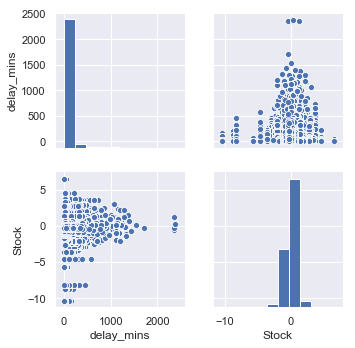

In [461]:
#pairplot bwteen numbers of mins flights get delay vs stock prices
sns.pairplot(test);

In [462]:
weather.columns

Index(['airport_id', 'datetime', 'temperature', 'visibility', 'wind_direction',
       'wind_speed', 'snow_depth', 'cloud_status'],
      dtype='object')

In [463]:
#take the average temperature, visibility, wind_speed, snow_depth, cloud_status of a day
weather=weather.groupby(['datetime','airport_id'])['temperature', 'visibility',
                                           'wind_speed', 'snow_depth', 'cloud_status'].mean().fillna(0).reset_index()
weather.head()

,datetime,airport_id,temperature,visibility,wind_speed,snow_depth,cloud_status
0,2017-01-01,ABE,6.250,16093.00,3.725,0.0,9.0
1,2017-01-01,ABI,9.725,16093.00,3.100,0.0,9.0
2,2017-01-01,ABQ,4.450,16093.00,3.200,0.0,9.0
3,2017-01-01,ABR,-7.500,16093.00,3.225,0.0,0.0
4,2017-01-01,ABY,12.900,14483.75,2.825,0.0,0.0
